<a href="https://colab.research.google.com/github/Bachos0605/Build-K-nearest-Neighbours-in-MLlib/blob/main/BNB_USD_Lasso_Regression_Model_Bach_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload file csv
from google.colab import files
uploaded = files.upload()

Saving BNB_USD.csv to BNB_USD.csv


In [ ]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
# Load dataset
data = pd.read_csv('/content/BNB_USD.csv')

In [ ]:
# Show dataset
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,6.191432,6.191929,5.885122,6.075273,6.075273,23891162
1,2019-01-02,6.091465,6.207873,5.949006,6.188613,6.188613,30308610
2,2019-01-03,6.171907,6.175116,5.901559,5.903535,5.903535,22821639
3,2019-01-04,5.895052,6.065898,5.863714,6.065138,6.065138,29311136
4,2019-01-05,6.055661,6.204376,6.034071,6.065543,6.065543,30340637
...,...,...,...,...,...,...,...
1600,2023-05-20,308.982422,311.842316,308.087982,310.719971,310.719971,277393160
1601,2023-05-21,310.709625,311.517700,306.478516,306.506714,306.506714,302803530
1602,2023-05-22,306.523468,310.835388,305.047638,309.245636,309.245636,355156561
1603,2023-05-23,309.249176,315.212677,309.238892,313.506226,313.506226,361568579


In [ ]:
# Drop Null
data = data.dropna()
data.count() 

Date         1605
Open         1605
High         1605
Low          1605
Close        1605
Adj Close    1605
Volume       1605
dtype: int64

In [ ]:
# Chia dữ liệu thành 3 tập Training, Testing, Validate
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [ ]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
# Tìm ra alpha tốt nhất bằng cross-validation
lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=8)
lasso_cv.fit(x_train, y_train)

print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.0001


In [ ]:
# Training the Lasso Regression model
lasso_model = Lasso(alpha=0.0001) 
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.0001)

In [ ]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

y_pred_lasso = lasso_model.predict(x_test)

In [ ]:
# Quá trình Validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

y_pred_val_lasso = lasso_model.predict(x_val)

In [ ]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index = data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

In [ ]:
# In predicted closing prices 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days_lasso = lasso_model.predict(x_next_30_days)
y_next_30_days_lasso

array([655.19104044, 655.6775377 , 656.16403495, 656.65053221,
       657.13702946, 657.62352672, 658.11002397, 658.59652123,
       659.08301848, 659.56951574, 660.056013  , 660.54251025,
       661.02900751, 661.51550476, 662.00200202, 662.48849927,
       662.97499653, 663.46149378, 663.94799104, 664.43448829,
       664.92098555, 665.4074828 , 665.89398006, 666.38047731,
       666.86697457, 667.35347183, 667.83996908, 668.32646634,
       668.81296359, 669.29946085])

In [ ]:
# Đánh giá độ chính xác validate, test
valid_rmse_lasso = np.sqrt(np.mean((y_pred_val_lasso - y_val) ** 2))
test_rmse_lasso = np.sqrt(np.mean((y_pred_lasso - y_test) ** 2))
print('Lasso Validation RMSE:', valid_rmse_lasso)
print('Lasso Testing RMSE:', test_rmse_lasso)

Lasso Validation RMSE: 313.59482505730296
Lasso Testing RMSE: 205.59068907679946


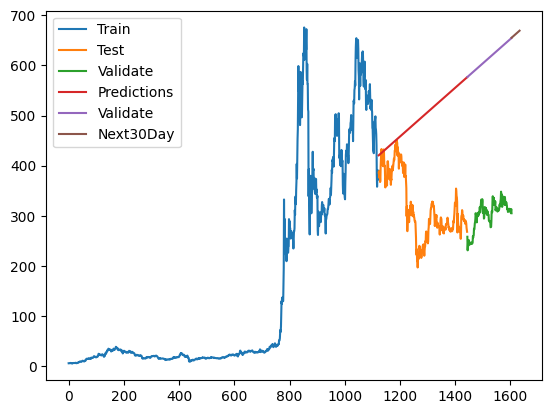

In [ ]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred_lasso)
plt.plot(val_data.index, y_pred_val_lasso)
plt.plot(last_data,y_next_30_days_lasso)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1123, stop=1444, step=1)